## Import Libraries

In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=ef12eb243fec5e5d67d94da7152c9e34b98fd8fb4064fb49e2937509dd1f46f2
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [3]:
# import modules from pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.sql import SQLContext
from pyspark.sql.functions import col

# setup the necessary contexts
spark = SparkSession.builder.enableHiveSupport().getOrCreate()
spark.sparkContext.setLogLevel("ERROR")
sqlContext = SQLContext(spark)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(



## Load the Data


In [4]:
# read the json file and create the dataframe

file_location = "/content/Clean_Dataset.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)


pd_df = df.toPandas()
pd_df

_c0   airline   flight source_city departure_time stops  \
0            0  SpiceJet  SG-8709       Delhi        Evening  zero   
1            1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2            2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3            3   Vistara   UK-995       Delhi        Morning  zero   
4            4   Vistara   UK-963       Delhi        Morning  zero   
...        ...       ...      ...         ...            ...   ...   
300148  300148   Vistara   UK-822     Chennai        Morning   one   
300149  300149   Vistara   UK-826     Chennai      Afternoon   one   
300150  300150   Vistara   UK-832     Chennai  Early_Morning   one   
300151  300151   Vistara   UK-828     Chennai  Early_Morning   one   
300152  300152   Vistara   UK-822     Chennai        Morning   one   

         arrival_time destination_city     class  duration  days_left  price  
0               Night           Mumbai   Economy      2.17          1   5953  
1             Morning           Mumbai   Economy      2.33          1   5953  
2       Early_Morning           Mumbai   Economy      2.17          1   5956  
3           Afternoon           Mumbai   Economy      2.25          1   5955  
4             Morning           Mumbai   Economy      2.33          1   5955  
...               ...              ...       ...       ...        ...    ...  
300148        Evening        Hyderabad  Business     10.08         49  69265  
300149          Night        Hyderabad  Business     10.42         49  77105  
300150          Night        Hyderabad  Business     13.83         49  79099  
300151        Evening        Hyderabad  Business     10.00         49  81585  
300152        Evening        Hyderabad  Business     10.08         49  81585  

[300153 rows x 12 columns]

In [6]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- airline: string (nullable = true)
 |-- flight: string (nullable = true)
 |-- source_city: string (nullable = true)
 |-- departure_time: string (nullable = true)
 |-- stops: string (nullable = true)
 |-- arrival_time: string (nullable = true)
 |-- destination_city: string (nullable = true)
 |-- class: string (nullable = true)
 |-- duration: double (nullable = true)
 |-- days_left: integer (nullable = true)
 |-- price: integer (nullable = true)



In [7]:
from pyspark.sql.functions import col, count, when

# Check is there any missing values
missing_values = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])
missing_values.show()

+---+-------+------+-----------+--------------+-----+------------+----------------+-----+--------+---------+-----+
|_c0|airline|flight|source_city|departure_time|stops|arrival_time|destination_city|class|duration|days_left|price|
+---+-------+------+-----------+--------------+-----+------------+----------------+-----+--------+---------+-----+
|  0|      0|     0|          0|             0|    0|           0|               0|    0|       0|        0|    0|
+---+-------+------+-----------+--------------+-----+------------+----------------+-----+--------+---------+-----+



In [8]:
# Move the target value to the first column
last_column_name = "price"

# Select the last column and then the remaining columns excluding the last one
selected_columns = [last_column_name] + [col for col in df.columns if col != last_column_name]

# Use select to rearrange the columns
df = df.select(selected_columns)

# Show the DataFrame to verify the column order
df.show(5)

+-----+---+--------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+
|price|_c0| airline| flight|source_city|departure_time|stops| arrival_time|destination_city|  class|duration|days_left|
+-----+---+--------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+
| 5953|  0|SpiceJet|SG-8709|      Delhi|       Evening| zero|        Night|          Mumbai|Economy|    2.17|        1|
| 5953|  1|SpiceJet|SG-8157|      Delhi| Early_Morning| zero|      Morning|          Mumbai|Economy|    2.33|        1|
| 5956|  2| AirAsia| I5-764|      Delhi| Early_Morning| zero|Early_Morning|          Mumbai|Economy|    2.17|        1|
| 5955|  3| Vistara| UK-995|      Delhi|       Morning| zero|    Afternoon|          Mumbai|Economy|    2.25|        1|
| 5955|  4| Vistara| UK-963|      Delhi|       Morning| zero|      Morning|          Mumbai|Economy|    2.33|        1|
+-----+---+--------+-------+-----------+

###### Notes:
 - Total records: 300153
 - No missing value
 - price --> target value
 - _c0, flight --> drop
 - airline, source_city, departure_time, stops, arrival_time, destination_city, class --> Categorical feature
 - duration, days_left --> numeric feature


## EDA


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Spark DataFrame to Pandas DataFrame for plotting
pdf = df.toPandas()

In [ ]:
pdf

price     _c0   airline  ...     class duration days_left
0        5953       0  SpiceJet  ...   Economy     2.17         1
1        5953       1  SpiceJet  ...   Economy     2.33         1
2        5956       2   AirAsia  ...   Economy     2.17         1
3        5955       3   Vistara  ...   Economy     2.25         1
4        5955       4   Vistara  ...   Economy     2.33         1
...       ...     ...       ...  ...       ...      ...       ...
300148  69265  300148   Vistara  ...  Business    10.08        49
300149  77105  300149   Vistara  ...  Business    10.42        49
300150  79099  300150   Vistara  ...  Business    13.83        49
300151  81585  300151   Vistara  ...  Business    10.00        49
300152  81585  300152   Vistara  ...  Business    10.08        49

[300153 rows x 12 columns]

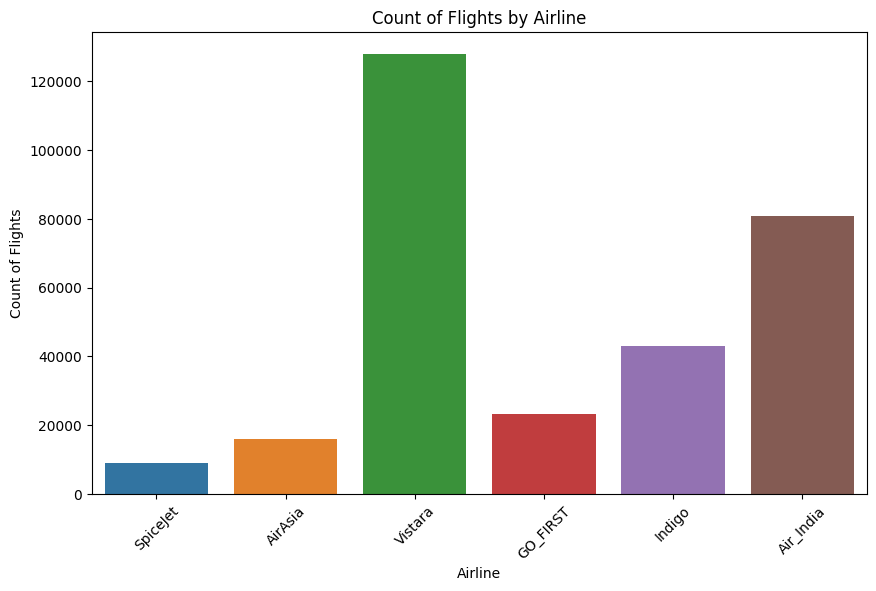

In [ ]:
# Count of Flights by Airline
plt.figure(figsize=(10, 6))
sns.countplot(x="airline", data=pdf)
plt.xticks(rotation=45)
plt.title("Count of Flights by Airline")
plt.xlabel("Airline")
plt.ylabel("Count of Flights")
plt.show()

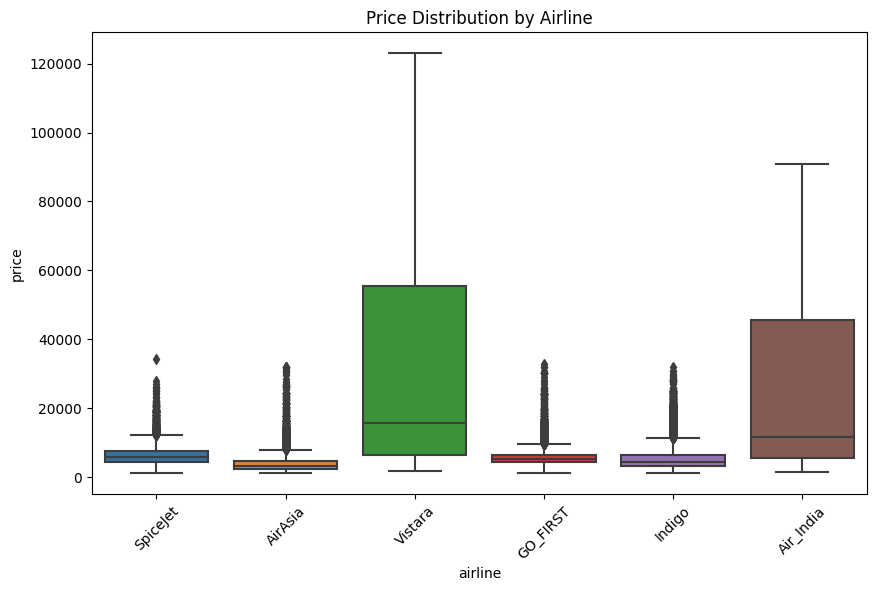

In [ ]:
# Price Distribution by Airline
plt.figure(figsize=(10, 6))
sns.boxplot(x="airline", y="price", data=pdf)
plt.xticks(rotation=45)
plt.title("Price Distribution by Airline")
plt.show()

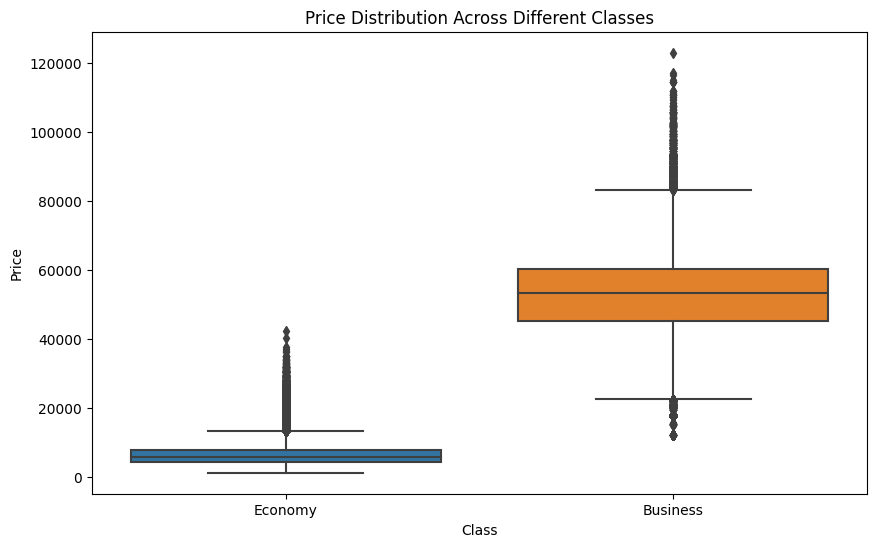

In [ ]:
# Price Distribution Across Different Classes
plt.figure(figsize=(10, 6))
sns.boxplot(x="class", y="price", data=pdf)
plt.title("Price Distribution Across Different Classes")
plt.xlabel("Class")
plt.ylabel("Price")
plt.show()

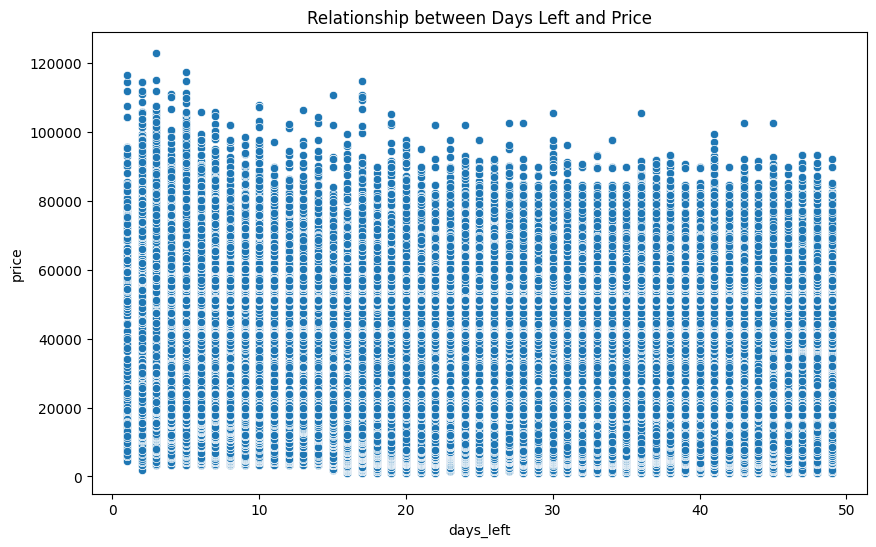

In [ ]:
# Relationship between Days Left and Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x="days_left", y="price", data=pdf)
plt.title("Relationship between Days Left and Price")
plt.show()

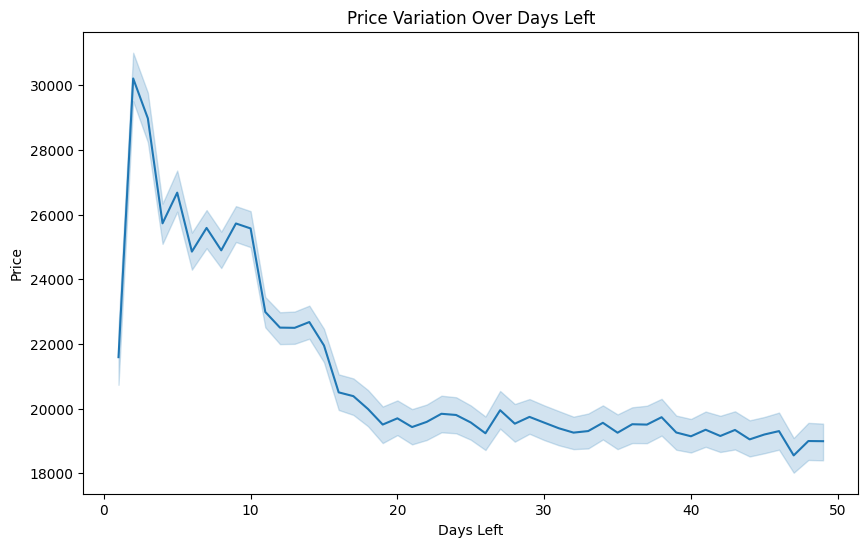

In [ ]:
# Price Variation Over Days Left
plt.figure(figsize=(10, 6))
sns.lineplot(x="days_left", y="price", data=pdf)
plt.title("Price Variation Over Days Left")
plt.xlabel("Days Left")
plt.ylabel("Price")
plt.show()

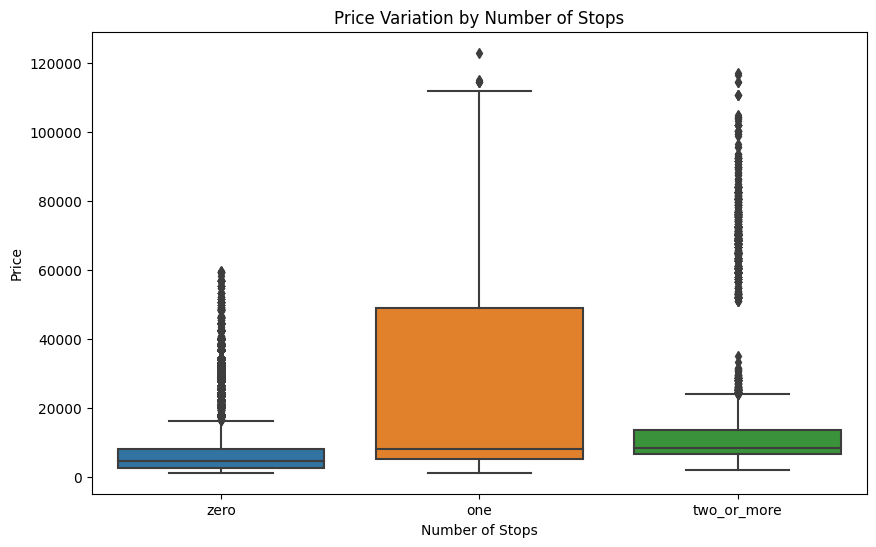

In [ ]:
# Price Variation by Number of Stops
plt.figure(figsize=(10, 6))
sns.boxplot(x="stops", y="price", data=pdf)
plt.title("Price Variation by Number of Stops")
plt.xlabel("Number of Stops")
plt.ylabel("Price")
plt.show()

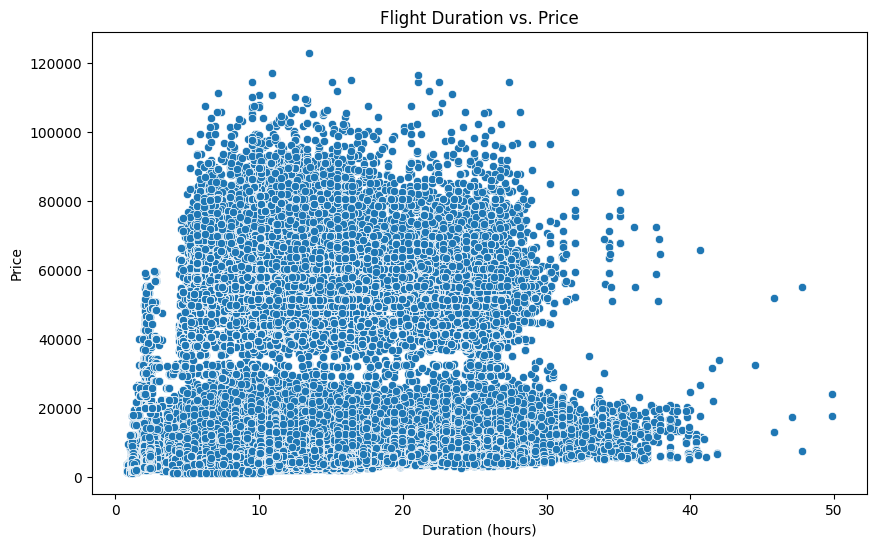

In [ ]:
# Flight Duration vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x="duration", y="price", data=pdf)
plt.title("Flight Duration vs. Price")
plt.xlabel("Duration (hours)")
plt.ylabel("Price")
plt.show()

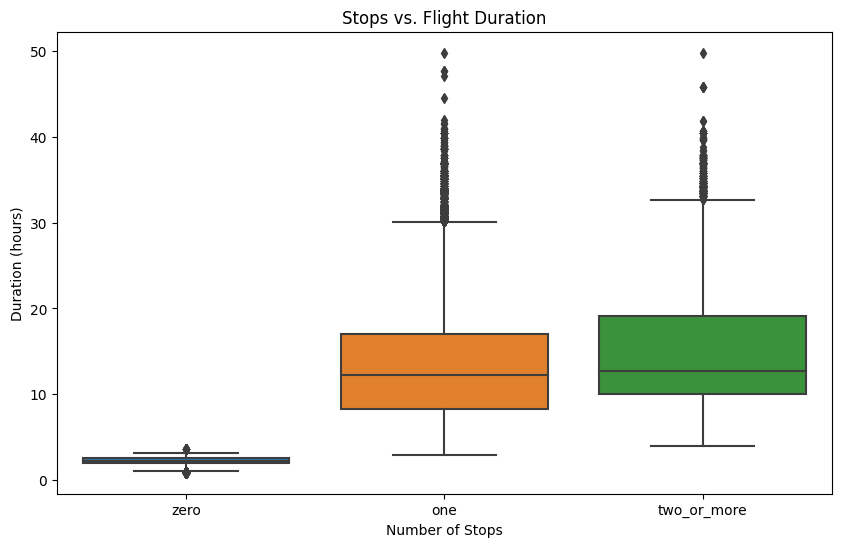

In [ ]:
# Stops vs. Flight Duration
plt.figure(figsize=(10, 6))
sns.boxplot(x="stops", y="duration", data=pdf)
plt.title("Stops vs. Flight Duration")
plt.xlabel("Number of Stops")
plt.ylabel("Duration (hours)")
plt.show()

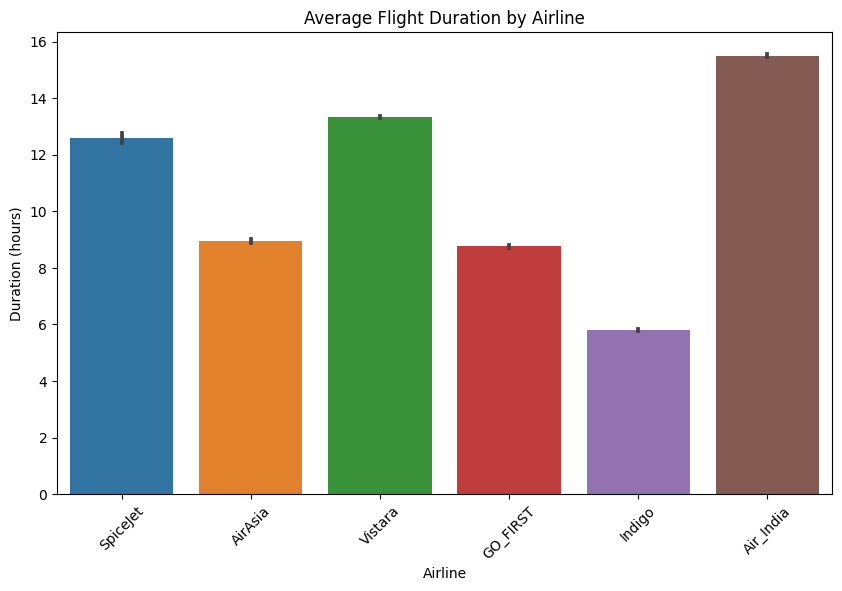

In [ ]:
# Average Flight Duration by Airline
plt.figure(figsize=(10, 6))
sns.barplot(x="airline", y="duration", data=pdf)
plt.xticks(rotation=45)
plt.title("Average Flight Duration by Airline")
plt.xlabel("Airline")
plt.ylabel("Duration (hours)")
plt.show()

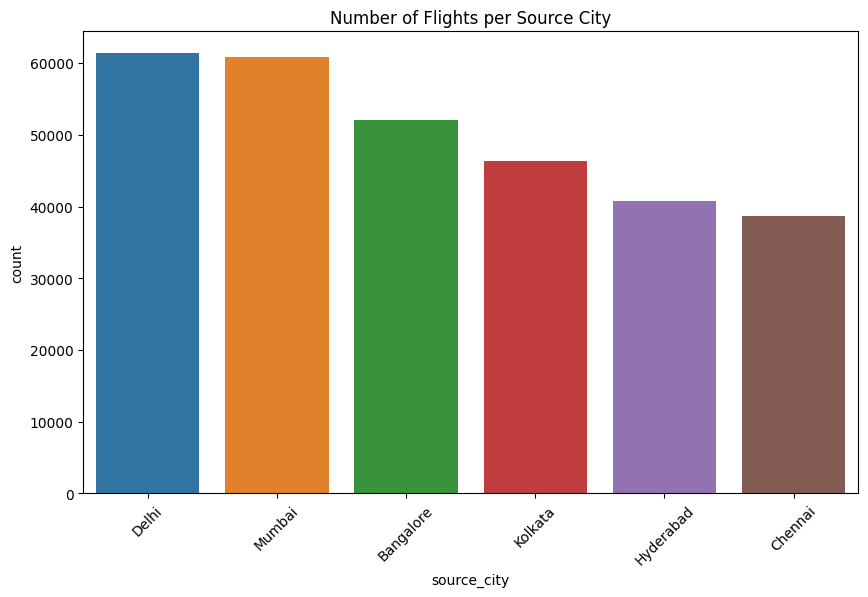

In [ ]:
# Number of Flights per Source City
plt.figure(figsize=(10, 6))
sns.countplot(x="source_city", data=pdf)
plt.xticks(rotation=45)
plt.title("Number of Flights per Source City")
plt.show()

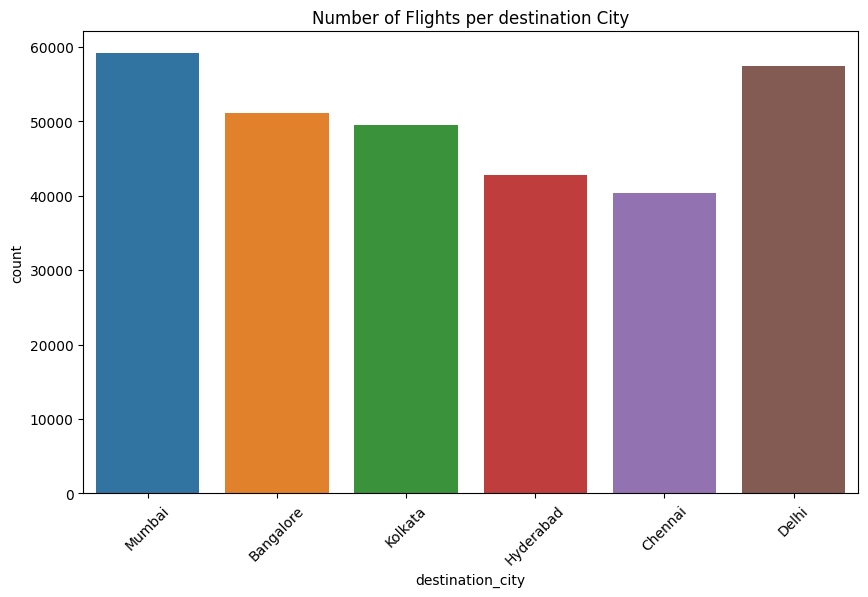

In [ ]:
# Number of Flights per destination City
plt.figure(figsize=(10, 6))
sns.countplot(x="destination_city", data=pdf)
plt.xticks(rotation=45)
plt.title("Number of Flights per destination City")
plt.show()

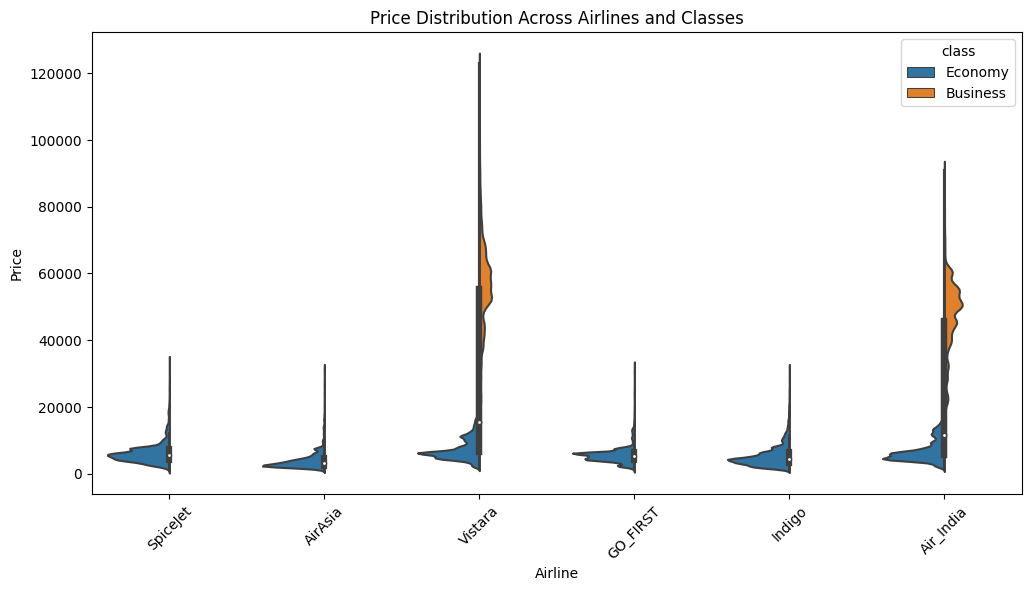

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x="airline", y="price", hue="class", data=pdf, split=True)
plt.xticks(rotation=45)
plt.title("Price Distribution Across Airlines and Classes")
plt.xlabel("Airline")
plt.ylabel("Price")
plt.show()

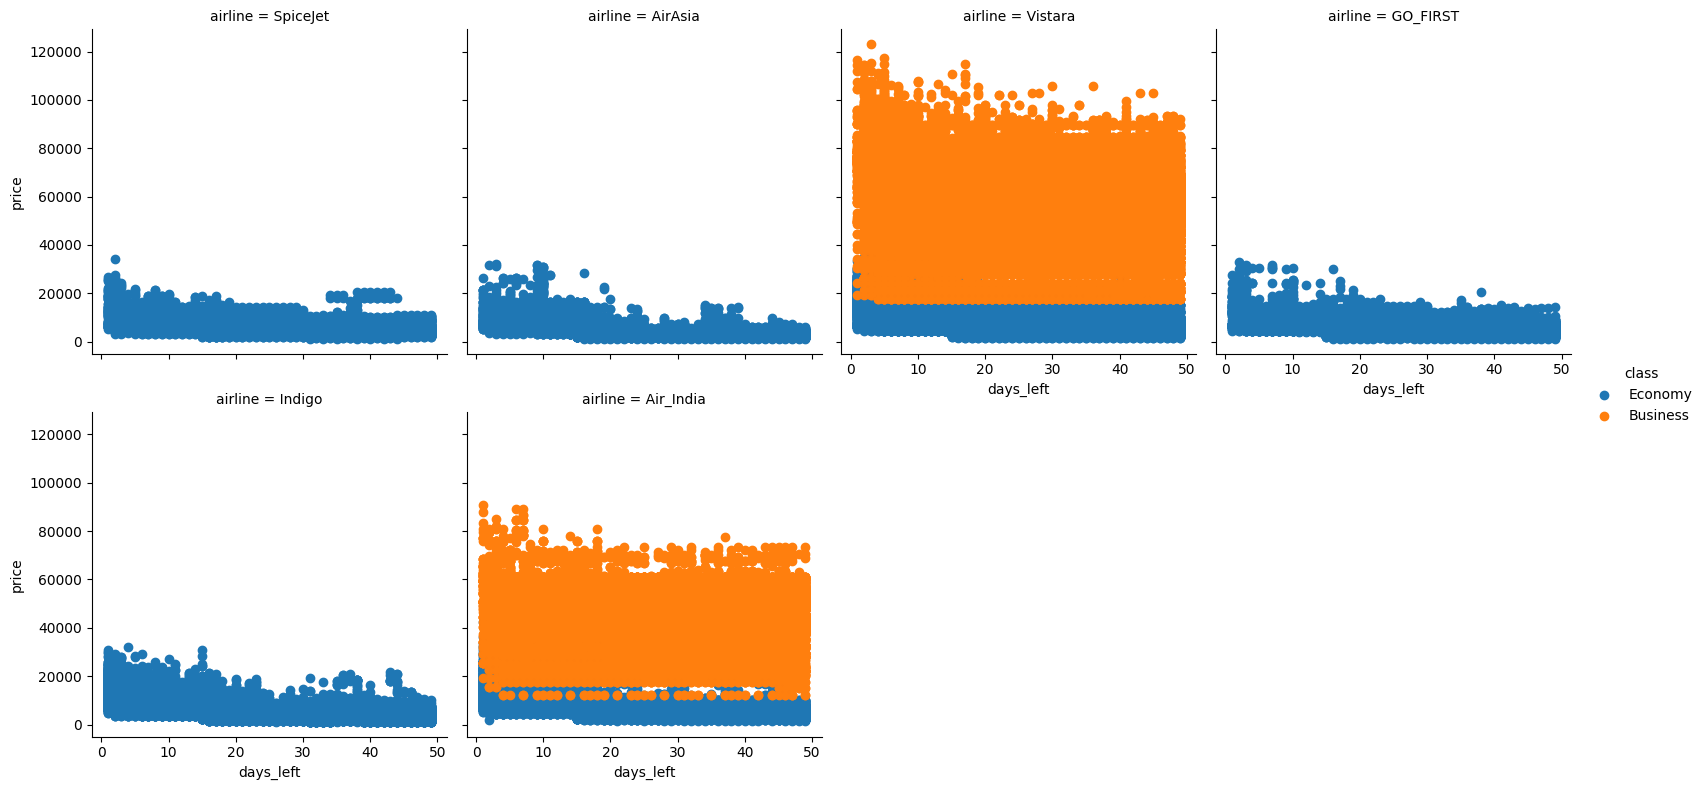

In [ ]:
g = sns.FacetGrid(pdf, col="airline", hue="class", col_wrap=4, height=4)
g = g.map(plt.scatter, "days_left", "price").add_legend()
plt.show()

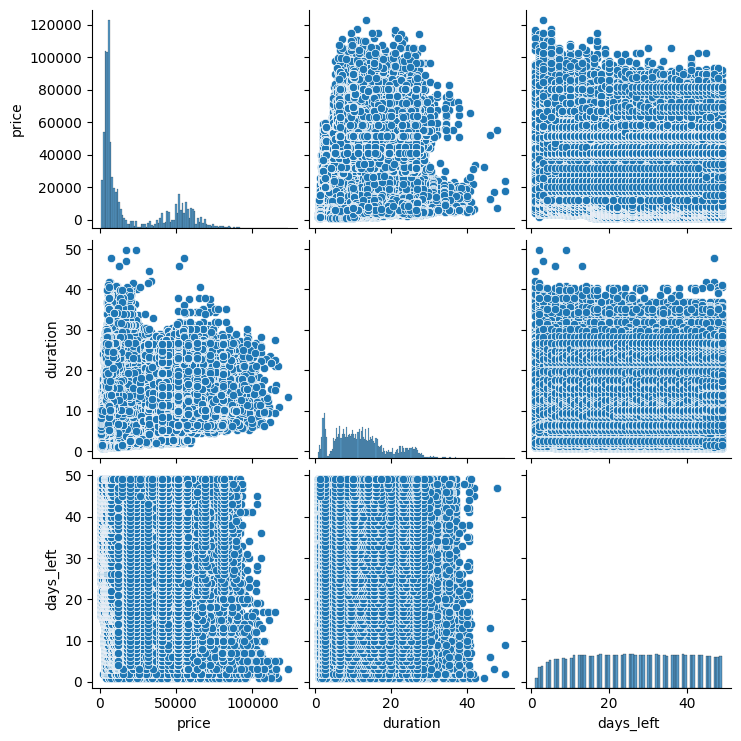

In [ ]:
# Selecting a few relevant columns for the pairplot
sns.pairplot(pdf[['price', 'duration', 'days_left']])
plt.show()

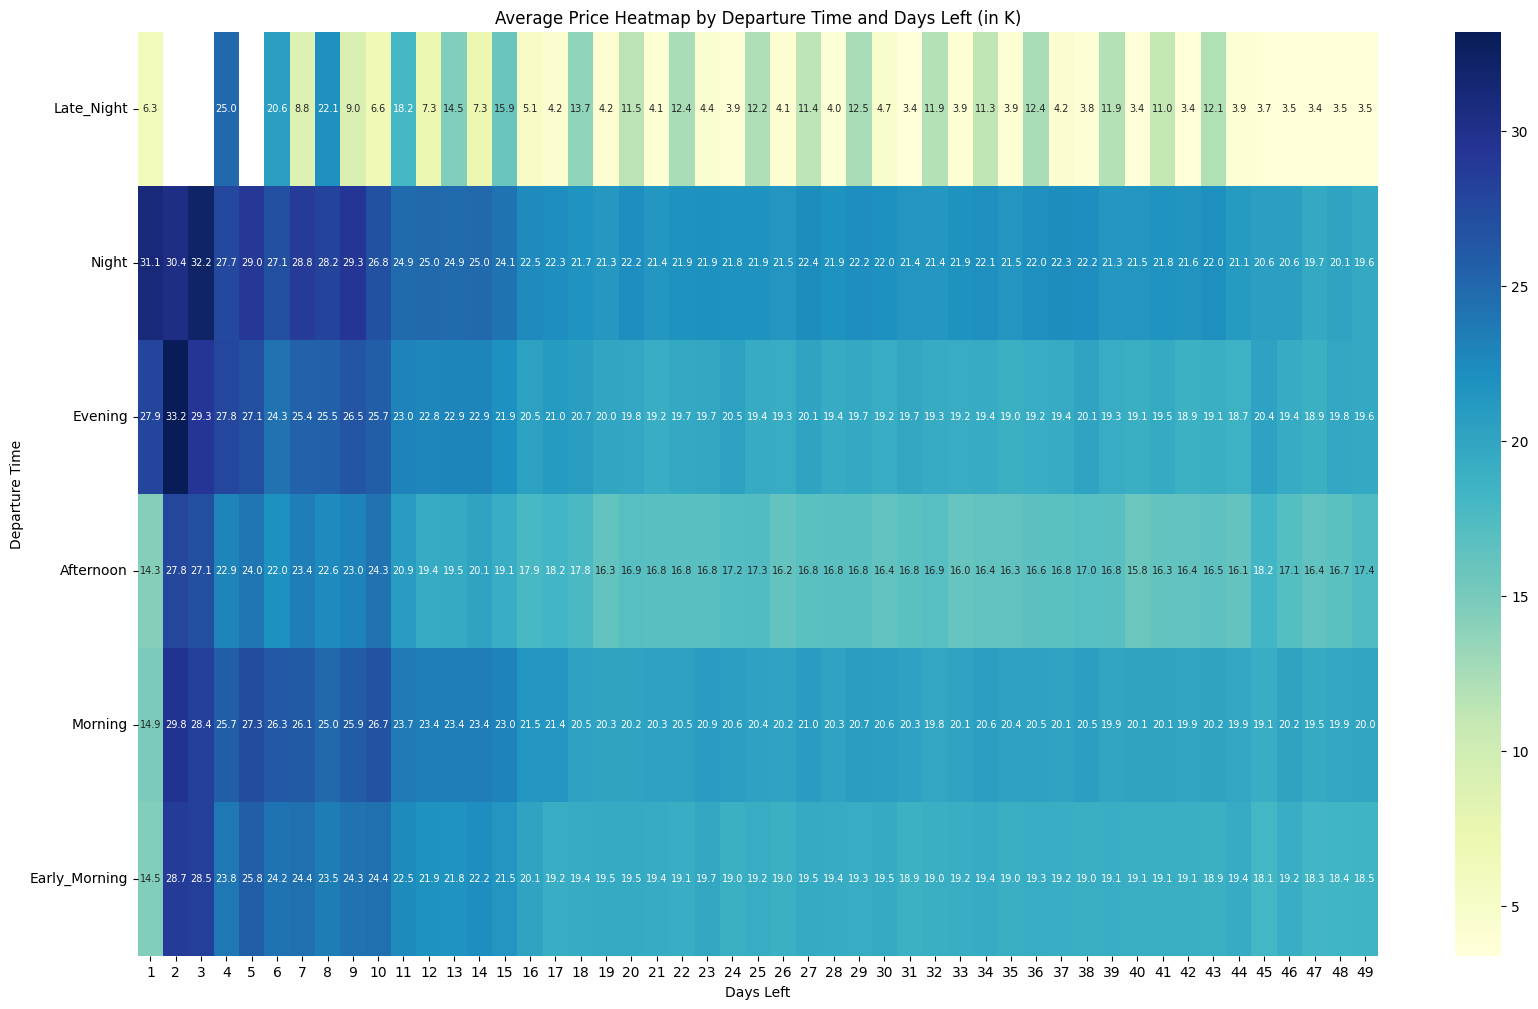

In [ ]:
from pandas.api.types import CategoricalDtype

# Define the order for departure times
time_order = ["Late_Night", "Night", "Evening", "Afternoon", "Morning", "Early_Morning"]

# Converting departure_time to an ordered categorical type
pdf['departure_time'] = pd.Categorical(pdf['departure_time'], categories=time_order, ordered=True)

# Sorting the DataFrame based on the ordered category
pdf.sort_values('departure_time', inplace=True)

# Creating a pivot table for the heatmap
pivot_table = pdf.pivot_table(index='departure_time', columns='days_left', values='price', aggfunc='mean')

# To improve readability of large numbers, we can divide by 1000 and add 'K' to represent thousands
pivot_table = pivot_table / 1000

plt.figure(figsize=(20, 12))
ax = sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", annot_kws={"size": 7})
plt.title("Average Price Heatmap by Departure Time and Days Left (in K)")
plt.xlabel("Days Left")
plt.ylabel("Departure Time")

# Fix for the missing labels in the y-axis
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter(pdf, x="duration", y="price", color="airline", hover_data=['days_left'])
fig.update_layout(title="Interactive Scatter Plot: Price vs Duration by Airline")
fig.show()


## Feature Engineering

In [9]:
df.show(10)

+-----+---+--------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+
|price|_c0| airline| flight|source_city|departure_time|stops| arrival_time|destination_city|  class|duration|days_left|
+-----+---+--------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+
| 5953|  0|SpiceJet|SG-8709|      Delhi|       Evening| zero|        Night|          Mumbai|Economy|    2.17|        1|
| 5953|  1|SpiceJet|SG-8157|      Delhi| Early_Morning| zero|      Morning|          Mumbai|Economy|    2.33|        1|
| 5956|  2| AirAsia| I5-764|      Delhi| Early_Morning| zero|Early_Morning|          Mumbai|Economy|    2.17|        1|
| 5955|  3| Vistara| UK-995|      Delhi|       Morning| zero|    Afternoon|          Mumbai|Economy|    2.25|        1|
| 5955|  4| Vistara| UK-963|      Delhi|       Morning| zero|      Morning|          Mumbai|Economy|    2.33|        1|
| 5955|  5| Vistara| UK-945|      Delhi|

In [11]:
from pyspark.ml.feature import StringIndexer

# Convert string columns to indexed numeric columns
indexer = StringIndexer(inputCols=["airline", "source_city", "departure_time",
                                   "stops", "arrival_time", "destination_city",
                                   "class"],
                        outputCols=["airline_index", "source_city_index",
                                    "departure_time_index", "stops_index",
                                    "arrival_time_index", "destination_city_index",
                                    "class_index"])
df_indexed = indexer.fit(df).transform(df)

df_indexed.show()

+-----+---+---------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+-------------+-----------------+--------------------+-----------+------------------+----------------------+-----------+
|price|_c0|  airline| flight|source_city|departure_time|stops| arrival_time|destination_city|  class|duration|days_left|airline_index|source_city_index|departure_time_index|stops_index|arrival_time_index|destination_city_index|class_index|
+-----+---+---------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+-------------+-----------------+--------------------+-----------+------------------+----------------------+-----------+
| 5953|  0| SpiceJet|SG-8709|      Delhi|       Evening| zero|        Night|          Mumbai|Economy|    2.17|        1|          5.0|              0.0|                 2.0|        1.0|               0.0|                   0.0|        0.0|
| 5953|  1| SpiceJet|SG-8157|      Delhi

In [12]:
nonFeatureCols = ["_c0", "flight", "airline", "source_city", "departure_time",
                  "stops", "arrival_time", "destination_city", "class"]
featureCols = [item for item in df.columns if item not in nonFeatureCols]

# VectorAssembler Assembles all of these columns into one single vector.
from pyspark.ml.feature import VectorAssembler

assembler = (VectorAssembler()
  .setInputCols(featureCols)
  .setOutputCol("features"))

finalPrep = assembler.transform(df)

In [13]:
finalPrep.show()

+-----+---+---------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+------------------+
|price|_c0|  airline| flight|source_city|departure_time|stops| arrival_time|destination_city|  class|duration|days_left|          features|
+-----+---+---------+-------+-----------+--------------+-----+-------------+----------------+-------+--------+---------+------------------+
| 5953|  0| SpiceJet|SG-8709|      Delhi|       Evening| zero|        Night|          Mumbai|Economy|    2.17|        1| [5953.0,2.17,1.0]|
| 5953|  1| SpiceJet|SG-8157|      Delhi| Early_Morning| zero|      Morning|          Mumbai|Economy|    2.33|        1| [5953.0,2.33,1.0]|
| 5956|  2|  AirAsia| I5-764|      Delhi| Early_Morning| zero|Early_Morning|          Mumbai|Economy|    2.17|        1| [5956.0,2.17,1.0]|
| 5955|  3|  Vistara| UK-995|      Delhi|       Morning| zero|    Afternoon|          Mumbai|Economy|    2.25|        1| [5955.0,2.25,1.0]|
| 5955|  4|  Vistara

In [14]:
training, test = finalPrep.randomSplit([0.7, 0.3])

# Going to cache the data to make sure things stay snappy!
training.cache()
test.cache()

print(training.count()) # Why execute count here??
print(test.count())

210431
89722


In [16]:
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline

gbtModel = (GBTRegressor()
  .setLabelCol("price")
  .setFeaturesCol("features"))

paramGrid = (ParamGridBuilder()
  .addGrid(gbtModel.maxDepth, [5, 10])
  .addGrid(gbtModel.maxIter, [20, 60])
  .build())

stages = [gbtModel]

pipeline = Pipeline().setStages(stages)

cv = (CrossValidator()
  .setEstimator(pipeline)
  .setEstimatorParamMaps(paramGrid)
  .setEvaluator(RegressionEvaluator().setLabelCol("price")))

pipelineFitted = cv.fit(training)

# Print the best model parameters
print("The Best Parameters:\n--------------------")
print(pipelineFitted.bestModel.stages[0])
pipelineFitted.bestModel.stages[0].extractParamMap()

The Best Parameters:
--------------------
GBTRegressionModel: uid=GBTRegressor_8f1ed9357451, numTrees=60, numFeatures=3


{Param(parent='GBTRegressor_8f1ed9357451', name='cacheNodeIds', doc='If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval.'): False,
 Param(parent='GBTRegressor_8f1ed9357451', name='checkpointInterval', doc='set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext.'): 10,
 Param(parent='GBTRegressor_8f1ed9357451', name='featureSubsetStrategy', doc="The number of features to consider for splits at each tree node. Supported options: 'auto' (choose automatically for task: If numTrees == 1, set to 'all'. If numTrees > 1 (forest), set to 'sqrt' for classification and to 'onethird' for regr

In [17]:
pipelineFitted.bestModel

holdout = (pipelineFitted.bestModel
  .transform(test)
  .selectExpr("prediction as raw_prediction",
    "double(round(prediction)) as rounded_prediction",
    "price",
    "abs(price - prediction) as absolute_difference"))

pd_holdout = holdout.toPandas()
pd_holdout

raw_prediction  rounded_prediction   price  absolute_difference
0         1828.945514              1829.0    1603           225.945514
1         1838.109105              1838.0    1603           235.109105
2         1838.109105              1838.0    1603           235.109105
3         1828.363247              1828.0    1603           225.363247
4         1828.363247              1828.0    1603           225.363247
...               ...                 ...     ...                  ...
89717    80000.197405             80000.0  111163         31162.802595
89718    84315.071443             84315.0  111964         27648.928557
89719    80000.197405             80000.0  114523         34522.802595
89720    78507.732254             78508.0  114704         36196.267746
89721    80482.270106             80482.0  117307         36824.729894

[89722 rows x 4 columns]

In [18]:
# Calculate Mean Squared Error (MSE)
mse_evaluator = RegressionEvaluator(labelCol="price", predictionCol="rounded_prediction", metricName="mse")
mse = mse_evaluator.evaluate(holdout)

# Calculate Root Mean Squared Error (RMSE)
rmse_evaluator = RegressionEvaluator(labelCol="price", predictionCol="rounded_prediction", metricName="rmse")
rmse = rmse_evaluator.evaluate(holdout)

# Calculate Mean Absolute Error (MAE)
mae_evaluator = RegressionEvaluator(labelCol="price", predictionCol="rounded_prediction", metricName="mae")
mae = mae_evaluator.evaluate(holdout)

# Calculate R-squared
r2_evaluator = RegressionEvaluator(labelCol="price", predictionCol="rounded_prediction", metricName="r2")
r2 = r2_evaluator.evaluate(holdout)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 2310407.5926974434
Root Mean Squared Error (RMSE): 1520.0024975957913
Mean Absolute Error (MAE): 601.4442611622568
R-squared: 0.9954942527652002


In [19]:
# Display the first few rows of the table
print(pd_holdout.sample(20))

       raw_prediction  rounded_prediction  price  absolute_difference
41956     8190.842019              8191.0   8534           343.157981
21301     5152.276433              5152.0   5120            32.276433
50567    15161.840315             15162.0  14113          1048.840315
17911     4580.182096              4580.0   4665            84.817904
34643     6503.246752              6503.0   6568            64.753248
59179     6877.993150              6878.0   7081           203.006850
21062     5155.013743              5155.0   5102            53.013743
51571    15253.415423             15253.0  15860           606.584577
18951     4891.459910              4891.0   4792            99.459910
47660    12457.004772             12457.0  11675           782.004772
46976    10924.417889             10924.0  11346           421.582111
16090     4549.777885              4550.0   4496            53.777885
52795    22287.456813             22287.0  22271            16.456813
39681     7500.71323

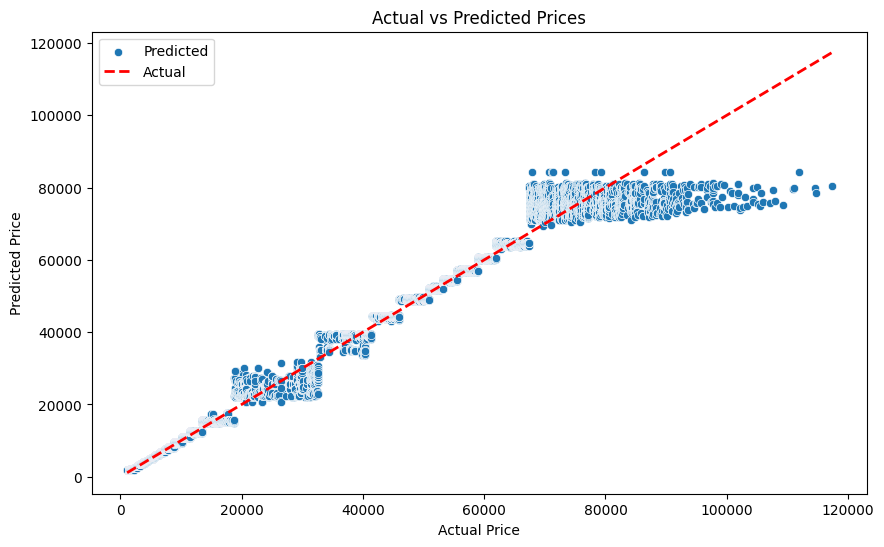

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x="price", y="rounded_prediction", data=pd_holdout)
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.plot([pd_holdout["price"].min(), pd_holdout["price"].max()],
         [pd_holdout["price"].min(), pd_holdout["price"].max()],
         color='red', lw=2, linestyle='--')
plt.legend(['Predicted', 'Actual'])
plt.show()